In [12]:
import pandas as pd
import seaborn as sns
#import xgboost
import shap
shap.initjs()
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import dash
#import dash_bootstrap_components as dbc
import graphviz
import pygraphviz

## AG Data

In [20]:
data_AG = pd.read_csv("mutation_A_to_G_predictions_sorted.csv", na_values='?')

In [33]:
data_AG.head(2)

,Unnamed: 0,name,seq,predicted_tm_mutation,fasta_name,mutation_position,tm,predicted_tm,delta_tm_predicted
0,633,>SEB,DVQLQASGGGLVQPGGSLRLTCAASGLIFGSYAMGWFRQAPGKARE...,76.28914,>SEB$90$A_to_G,90,66.9,49.756474,-26.532665
1,611,>CC3,MAQVKLQASGGGSVQGGGSLRLSCVTSQNLFEYYTMGWYRQVPGSQ...,42.96859,>CC3$15$A_to_G,15,70.0,68.974167,26.005577


In [54]:
AG_protein = data_AG.loc[data_AG['name'].str.contains('Z18') | data_AG['name'].str.contains('A26.8')]

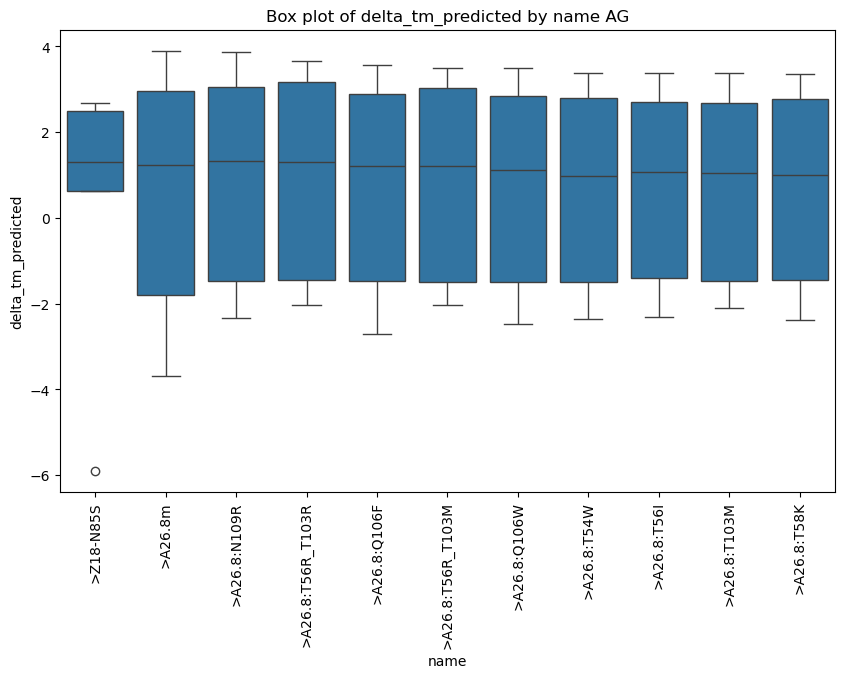

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='name', y='delta_tm_predicted', data=AG_protein)
plt.title('Box plot of delta_tm_predicted by name AG')
plt.xticks(rotation=90)  # Rotate the x labels if necessary
plt.show()

## Data AF

In [25]:
data_AF = pd.read_csv("mutation_A_to_F_predictions_sorted.csv", na_values='?')

In [56]:
AF_protein = data_AF.loc[data_AF['name'].str.contains('Z18') | data_AF['name'].str.contains('A26.8')]

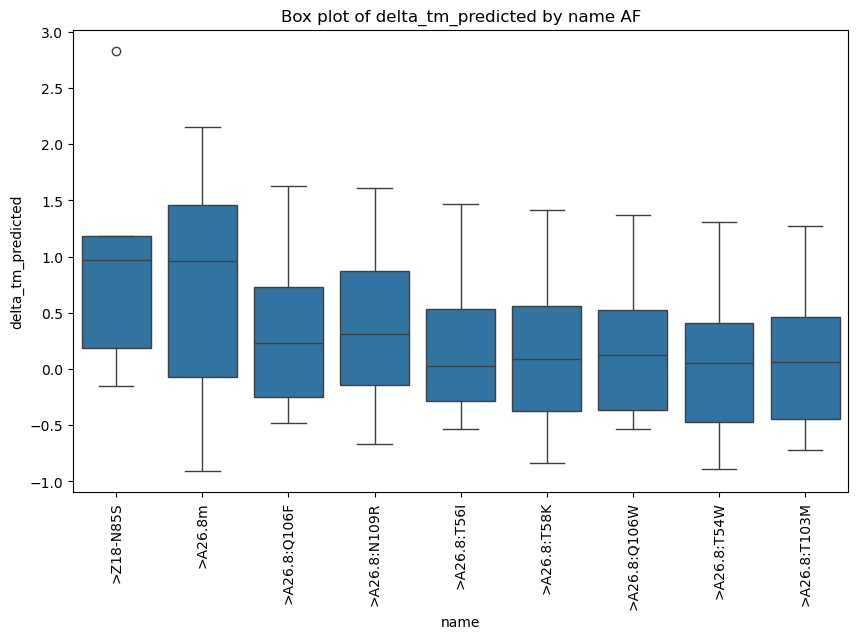

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='name', y='delta_tm_predicted', data=AF_protein)
plt.title('Box plot of delta_tm_predicted by name AF')
plt.xticks(rotation=90)  # Rotate the x labels if necessary
plt.show()

## Merged

In [35]:
merged_data = pd.merge(data_AG, data_AF, on='name', suffixes=('_AG', '_AF'))

In [36]:
merged_data['delta_tm_difference'] = merged_data['delta_tm_predicted_AG'] - merged_data['delta_tm_predicted_AF']

In [51]:
# Filter rows where 'name' column contains 'Z18' or 'A26.8'
merged_protein = merged_data.loc[merged_data['name'].str.contains('Z18') | merged_data['name'].str.contains('A26.8')]
#merged_protein

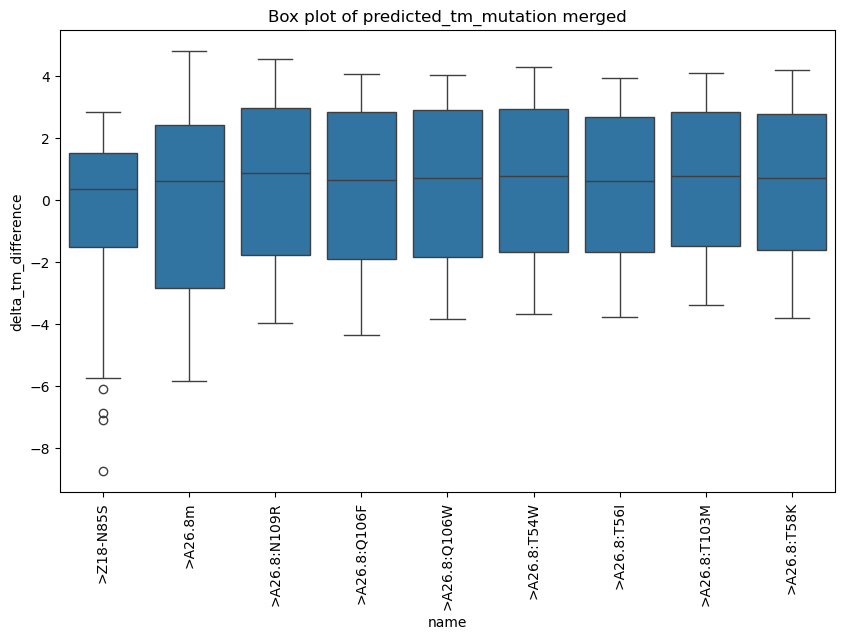

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='name', y='delta_tm_difference', data=merged_protein)
plt.title('Box plot of predicted_tm_mutation merged')
plt.xticks(rotation=90)  # Rotate the x labels if necessary
plt.show()

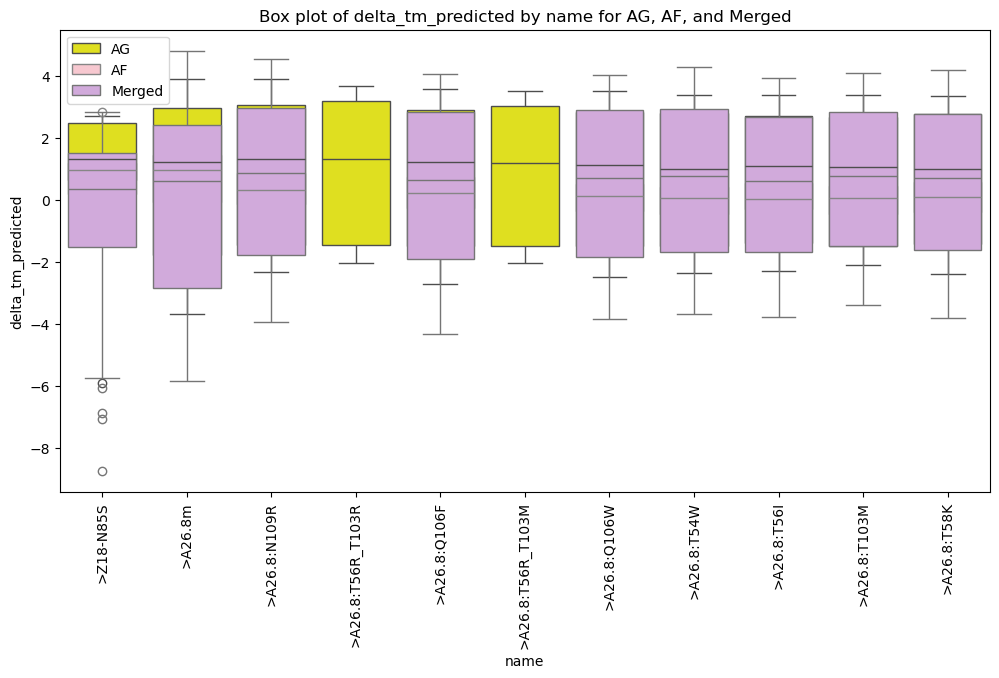

In [73]:
plt.figure(figsize=(12, 6))

# Plot box plot for data_AG with dark blue and lower transparency
ax = sns.boxplot(x='name', y='delta_tm_predicted', data=AG_protein, color='yellow', label='AG')  # Dark blue
for patch in ax.artists:
    patch.set_alpha(0.5)  # Set transparency for data_AG

# Plot box plot for data_AF with light blue and medium transparency
ax = sns.boxplot(x='name', y='delta_tm_predicted', data=AF_protein, color='pink', label='AF')  # Light blue
for patch in ax.artists:
    patch.set_alpha(0.2)  # Set transparency for data_AF

# Plot box plot for merged_data with medium blue and higher transparency
ax = sns.boxplot(x='name', y='delta_tm_difference', data=merged_protein, color='#D6A2E3', label='Merged')  # Medium blue
for patch in ax.artists:
    patch.set_alpha(0.8)  # Set transparency for merged_data

# Set the title and rotate the x-axis labels
plt.title('Box plot of delta_tm_predicted by name for AG, AF, and Merged')
plt.xticks(rotation=90)

# Display the plot
plt.show()
